<a href="https://colab.research.google.com/github/vbddinho/puc_minas_machine/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [49]:
#Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', True)

In [50]:
#Configurando os plots para serem emandanteibidos diretamente no notebook
%matplotlib inline

In [ ]:
#df = pd.read_csv('dados/transformado.csv',sep=',',encoding = "UTF-8")

In [51]:
df = pd.read_csv('/content/transformado.csv',sep=',',encoding = "UTF-8")

In [52]:
df.tail()

partida_id  rodada       mandante    visitante formacao_mandante formacao_visitante       vencedor  mandante_placar  visitante_placar clube_mandante  chutes_mandante  chutes_no_alvo_mandante  posse_de_bola_mandante  passes_mandante  precisao_passes_mandante  faltas_mandante  cartao_amarelo_mandante  cartao_vermelho_mandante  impedimentos_mandante  escanteios_mandante  rodata_visitante clube_visitante  chutes_visitante  chutes_no_alvo_visitante  posse_de_bola_visitante  passes_visitante  precisao_passes_visitante  faltas_visitante  cartao_amarelo_visitante  cartao_vermelho_visitante  impedimentos_visitante  escanteios_visitante  temporada  resultado
1871        8021      38         Cuiaba     Coritiba           4-1-4-1            4-1-4-1         Cuiaba                2                 1         Cuiaba               17                        8                    0.57              505                      0.88                9                        1                         0                      2                    8                38        Coritiba                 4                         2                     0.43               389                       0.82                 8                         3                          1                       2                     1       2022          1
1872        8022      38     Bragantino   Fluminense           4-2-3-1            4-2-3-1     Fluminense                0                 1     Bragantino               13                        4                    0.41              319                      0.77               16                        3                         0                      5                    4                38      Fluminense                 8                         4                     0.59               463                       0.82                15                         2                          0                       0                     9       2022          2
1873        8023      38    Corinthians  Atletico-MG           4-1-4-1            4-2-3-1    Atletico-MG                0                 1    Corinthians               17                        4                    0.59              494                      0.84               11                        3                         0                      1                    5                38     Atletico-MG                17                         7                     0.41               351                       0.82                19                         6                          0                       0                     4       2022          2
1874        8024      38  Internacional    Palmeiras           4-2-3-1            4-2-3-1  Internacional                3                 0  Internacional               15                        8                    0.48              287                      0.77               13                        2                         0                      1                    6                38       Palmeiras                11                         2                     0.52               306                       0.82                17                         3                          0                       2                     5       2022          1
1875        8025      38          Goias    Sao Paulo           4-2-3-1          4-1-2-1-2      Sao Paulo                0                 4          Goias                6                        2                    0.35              330                      0.80               12                        2                         0                      1                    3                38       Sao Paulo                13                         7                     0.65               591                       0.90                14                         1                          0                       0                     4       2022          2

In [53]:

print("Temporadas há serem analisadas: ", str(df.temporada.unique()))
print("Total de Partidas:", df.shape[0])
print("Total de Gols :", df.mandante_placar.sum() + df.visitante_placar.sum())
print("Total de Gols Mandante: {}".format(df.mandante_placar.sum()) , " - Corresponde a {0:.0f}% do total".format( (df.mandante_placar.sum() / (df.mandante_placar.sum() + df.visitante_placar.sum()) )*100))
print("Total de Gols Visitante: {}".format(df.visitante_placar.sum()) , " - Corresponde a {0:.0f}% do total".format((df.visitante_placar.sum() / (df.mandante_placar.sum() + df.visitante_placar.sum()))*100 ))


Temporadas há serem analisadas:  [2018 2019 2020 2021 2022]
Total de Partidas: 1876
Total de Gols : 4344
Total de Gols Mandante: 2579  - Corresponde a 59% do total
Total de Gols Visitante: 1765  - Corresponde a 41% do total


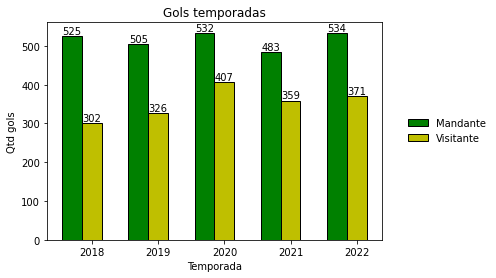

In [54]:
tgols_mandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"mandante_placar" :'sum'})).reset_index()
tgols_visitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"visitante_placar" :'sum'})).reset_index()

#plt.figure(figsize=(8, 8))
width = 0.30

r1 = np.arange(len( tgols_mandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, tgols_mandante['mandante_placar'], color = 'g', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, tgols_visitante['visitante_placar'], color = 'y',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd gols")
plt.title("Gols temporadas")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

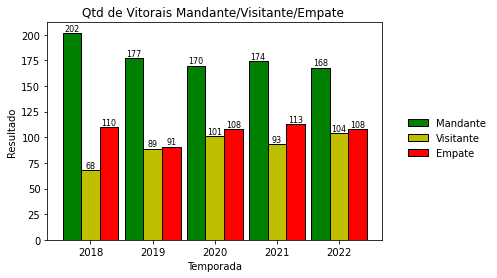

In [55]:
result_temp1 = pd.DataFrame(df[(df['resultado'] ==1 )].groupby([df['temporada']]).agg({'partida_id':'count'})).reset_index()
result_temp2 = pd.DataFrame(df[(df['resultado'] ==2 )].groupby([df['temporada']]).agg({'partida_id':'count'})).reset_index()
result_temp3 = pd.DataFrame(df[(df['resultado'] ==3 )].groupby([df['temporada']]).agg({'partida_id':'count'})).reset_index()

width = 0.30

r1 = np.arange(len( result_temp1['temporada']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt1 = plt.bar(r1, result_temp1['partida_id'], color = 'g', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, result_temp2['partida_id'], color = 'y',width = width, edgecolor = 'black', label="Visitante")
plt3 = plt.bar(r3, result_temp3['partida_id'], color = 'r',width = width, edgecolor = 'black', label="Empate")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Resultado")
plt.title("Qtd de Vitorais Mandante/Visitante/Empate ")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=8, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=8, label_type="edge")
plt.bar_label(plt3, fmt="%.0f", size=8, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

In [74]:
tt = pd.DataFrame(df[(df['vencedor']!='-')].groupby([df['temporada'],df['vencedor']]).agg({'partida_id':'count'}))
tt.sort_values(by=['temporada','partida_id'],ascending=False).reset_index()

#tt.groupby([tt['temporada'],tt['vencedor']]).agg({'partida_id':'max'}).reset_index()

temporada       vencedor  partida_id
0        2022      Palmeiras          23
1        2022     Fluminense          21
2        2022  Internacional          20
3        2022    Corinthians          18
4        2022       Flamengo          18
5        2022   Athletico-PR          16
6        2022     America-MG          15
7        2022    Atletico-MG          15
8        2022    Botafogo-RJ          15
9        2022      Fortaleza          15
10       2022      Sao Paulo          13
11       2022       Coritiba          12
12       2022         Santos          12
13       2022     Bragantino          11
14       2022          Goias          11
15       2022         Cuiaba          10
16       2022           Avai           9
17       2022    Atletico-GO           8
18       2022          Ceara           7
19       2022      Juventude           3
20       2021    Atletico-MG          26
21       2021       Flamengo          21
22       2021      Palmeiras          20
23       2021      Fortaleza          17
24       2021    Corinthians          15
25       2021     Fluminense          15
26       2021     Bragantino          14
27       2021     America-MG          13
28       2021   Athletico-PR          13
29       2021    Atletico-GO          13
30       2021         Gremio          12
31       2021  Internacional          12
32       2021         Santos          12
33       2021          Bahia          11
34       2021          Ceara          11
35       2021      Juventude          11
36       2021      Sao Paulo          11
37       2021         Cuiaba          10
38       2021          Sport           9
39       2021    Chapecoense           1
40       2020       Flamengo          21
41       2020  Internacional          20
42       2020    Atletico-MG          19
43       2020     Fluminense          18
44       2020      Sao Paulo          18
45       2020   Athletico-PR          15
46       2020      Palmeiras          15
47       2020          Ceara          14
48       2020         Gremio          14
49       2020         Santos          14
50       2020     Bragantino          13
51       2020    Corinthians          13
52       2020    Atletico-GO          12
53       2020          Bahia          12
54       2020          Sport          12
55       2020      Fortaleza          10
56       2020          Vasco          10
57       2020          Goias           9
58       2020       Coritiba           7
59       2020    Botafogo-RJ           5
60       2019       Flamengo          27
61       2019         Santos          22
62       2019      Palmeiras          20
63       2019         Gremio          18
64       2019  Internacional          16
65       2019      Sao Paulo          16
66       2019      Fortaleza          15
67       2019    Corinthians          14
68       2019          Goias          14
69       2019    Atletico-MG          13
70       2019    Botafogo-RJ          13
71       2019          Bahia          12
72       2019     Fluminense          12
73       2019          Vasco          12
74       2019          Ceara          10
75       2019   Athletico-PR           8
76       2019            CSA           8
77       2019    Chapecoense           7
78       2019       Cruzeiro           7
79       2019           Avai           2
80       2018      Palmeiras          23
81       2018       Flamengo          21
82       2018  Internacional          19
83       2018         Gremio          18
84       2018    Atletico-MG          17
85       2018   Athletico-PR          16
86       2018      Sao Paulo          16
87       2018       Cruzeiro          14
88       2018    Botafogo-RJ          13
89       2018         Santos          13
90       2018          Bahia          12
91       2018     Fluminense          12
92       2018    Chapecoense          11
93       2018    Corinthians          11
94       2018          Sport          11
95       2018     America-MG          10
96       2018          Cear

In [ ]:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
numerical_attributes = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

In [43]:
attmandante = ['mandante_placar','chutes_mandante','chutes_no_alvo_mandante','posse_de_bola_mandante','passes_mandante','precisao_passes_mandante','faltas_mandante','cartao_amarelo_mandante','cartao_vermelho_mandante', 'impedimentos_mandante', 'escanteios_mandante']
attvisitante = ['visitante_placar','chutes_visitante', 'chutes_no_alvo_visitante', 'posse_de_bola_visitante', 'passes_visitante', 'precisao_passes_visitante', 'faltas_visitante', 'cartao_amarelo_visitante', 'cartao_vermelho_visitante', 'impedimentos_visitante', 'escanteios_visitante']

array([[<Axes: xlabel='mandante_placar', ylabel='mandante_placar'>,
        <Axes: xlabel='chutes_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='chutes_no_alvo_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='posse_de_bola_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='passes_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='precisao_passes_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='faltas_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='cartao_amarelo_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='cartao_vermelho_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='impedimentos_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='escanteios_mandante', ylabel='mandante_placar'>],
       [<Axes: xlabel='mandante_placar', ylabel='chutes_mandante'>,
        <Axes: xlabel='chutes_mandante', ylabel='chutes_mandante'>,
        <Axes: xlabel='chutes_no_alvo_mandante', ylabel='chutes_

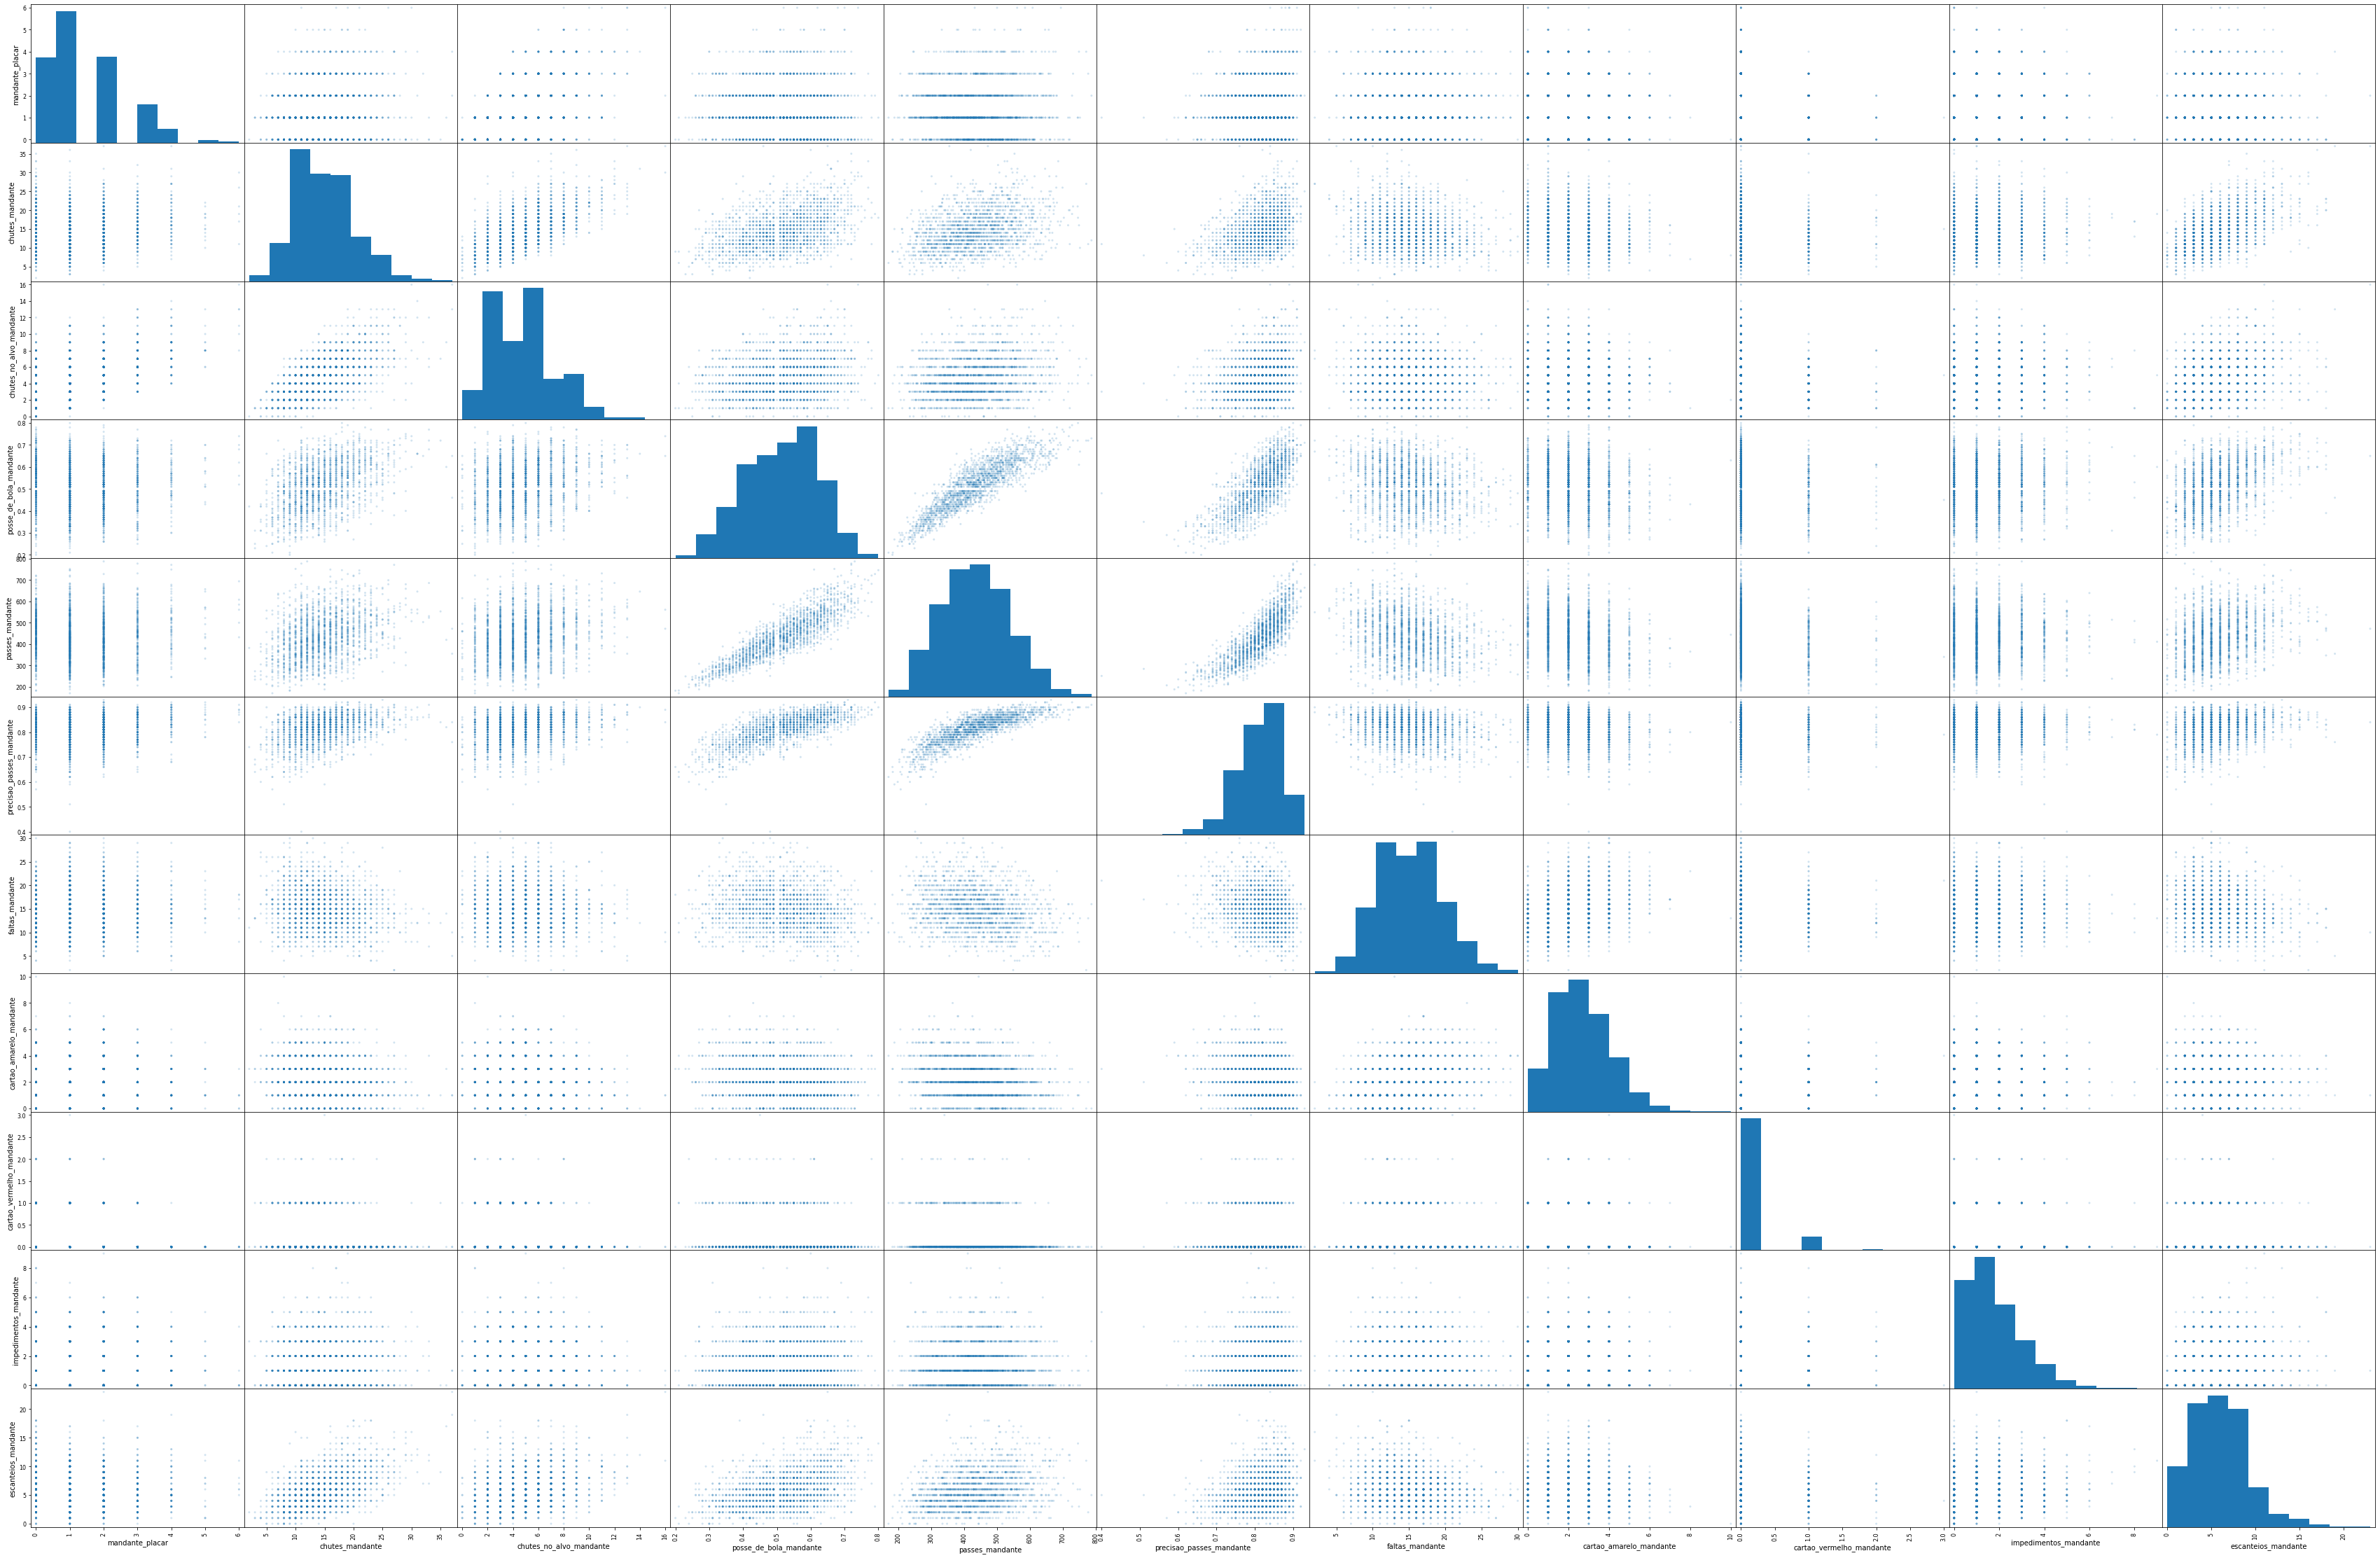

In [44]:
#Distribuição dos mandantes
scatter_matrix(df[attmandante], figsize=(60,40), alpha=0.2)


array([[<Axes: xlabel='visitante_placar', ylabel='visitante_placar'>,
        <Axes: xlabel='chutes_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='chutes_no_alvo_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='posse_de_bola_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='passes_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='precisao_passes_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='faltas_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='cartao_amarelo_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='cartao_vermelho_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='impedimentos_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='escanteios_visitante', ylabel='visitante_placar'>],
       [<Axes: xlabel='visitante_placar', ylabel='chutes_visitante'>,
        <Axes: xlabel='chutes_visitante', ylabel='chutes_visitante'>,
        <Axes: xlabel='chutes_no_alvo_

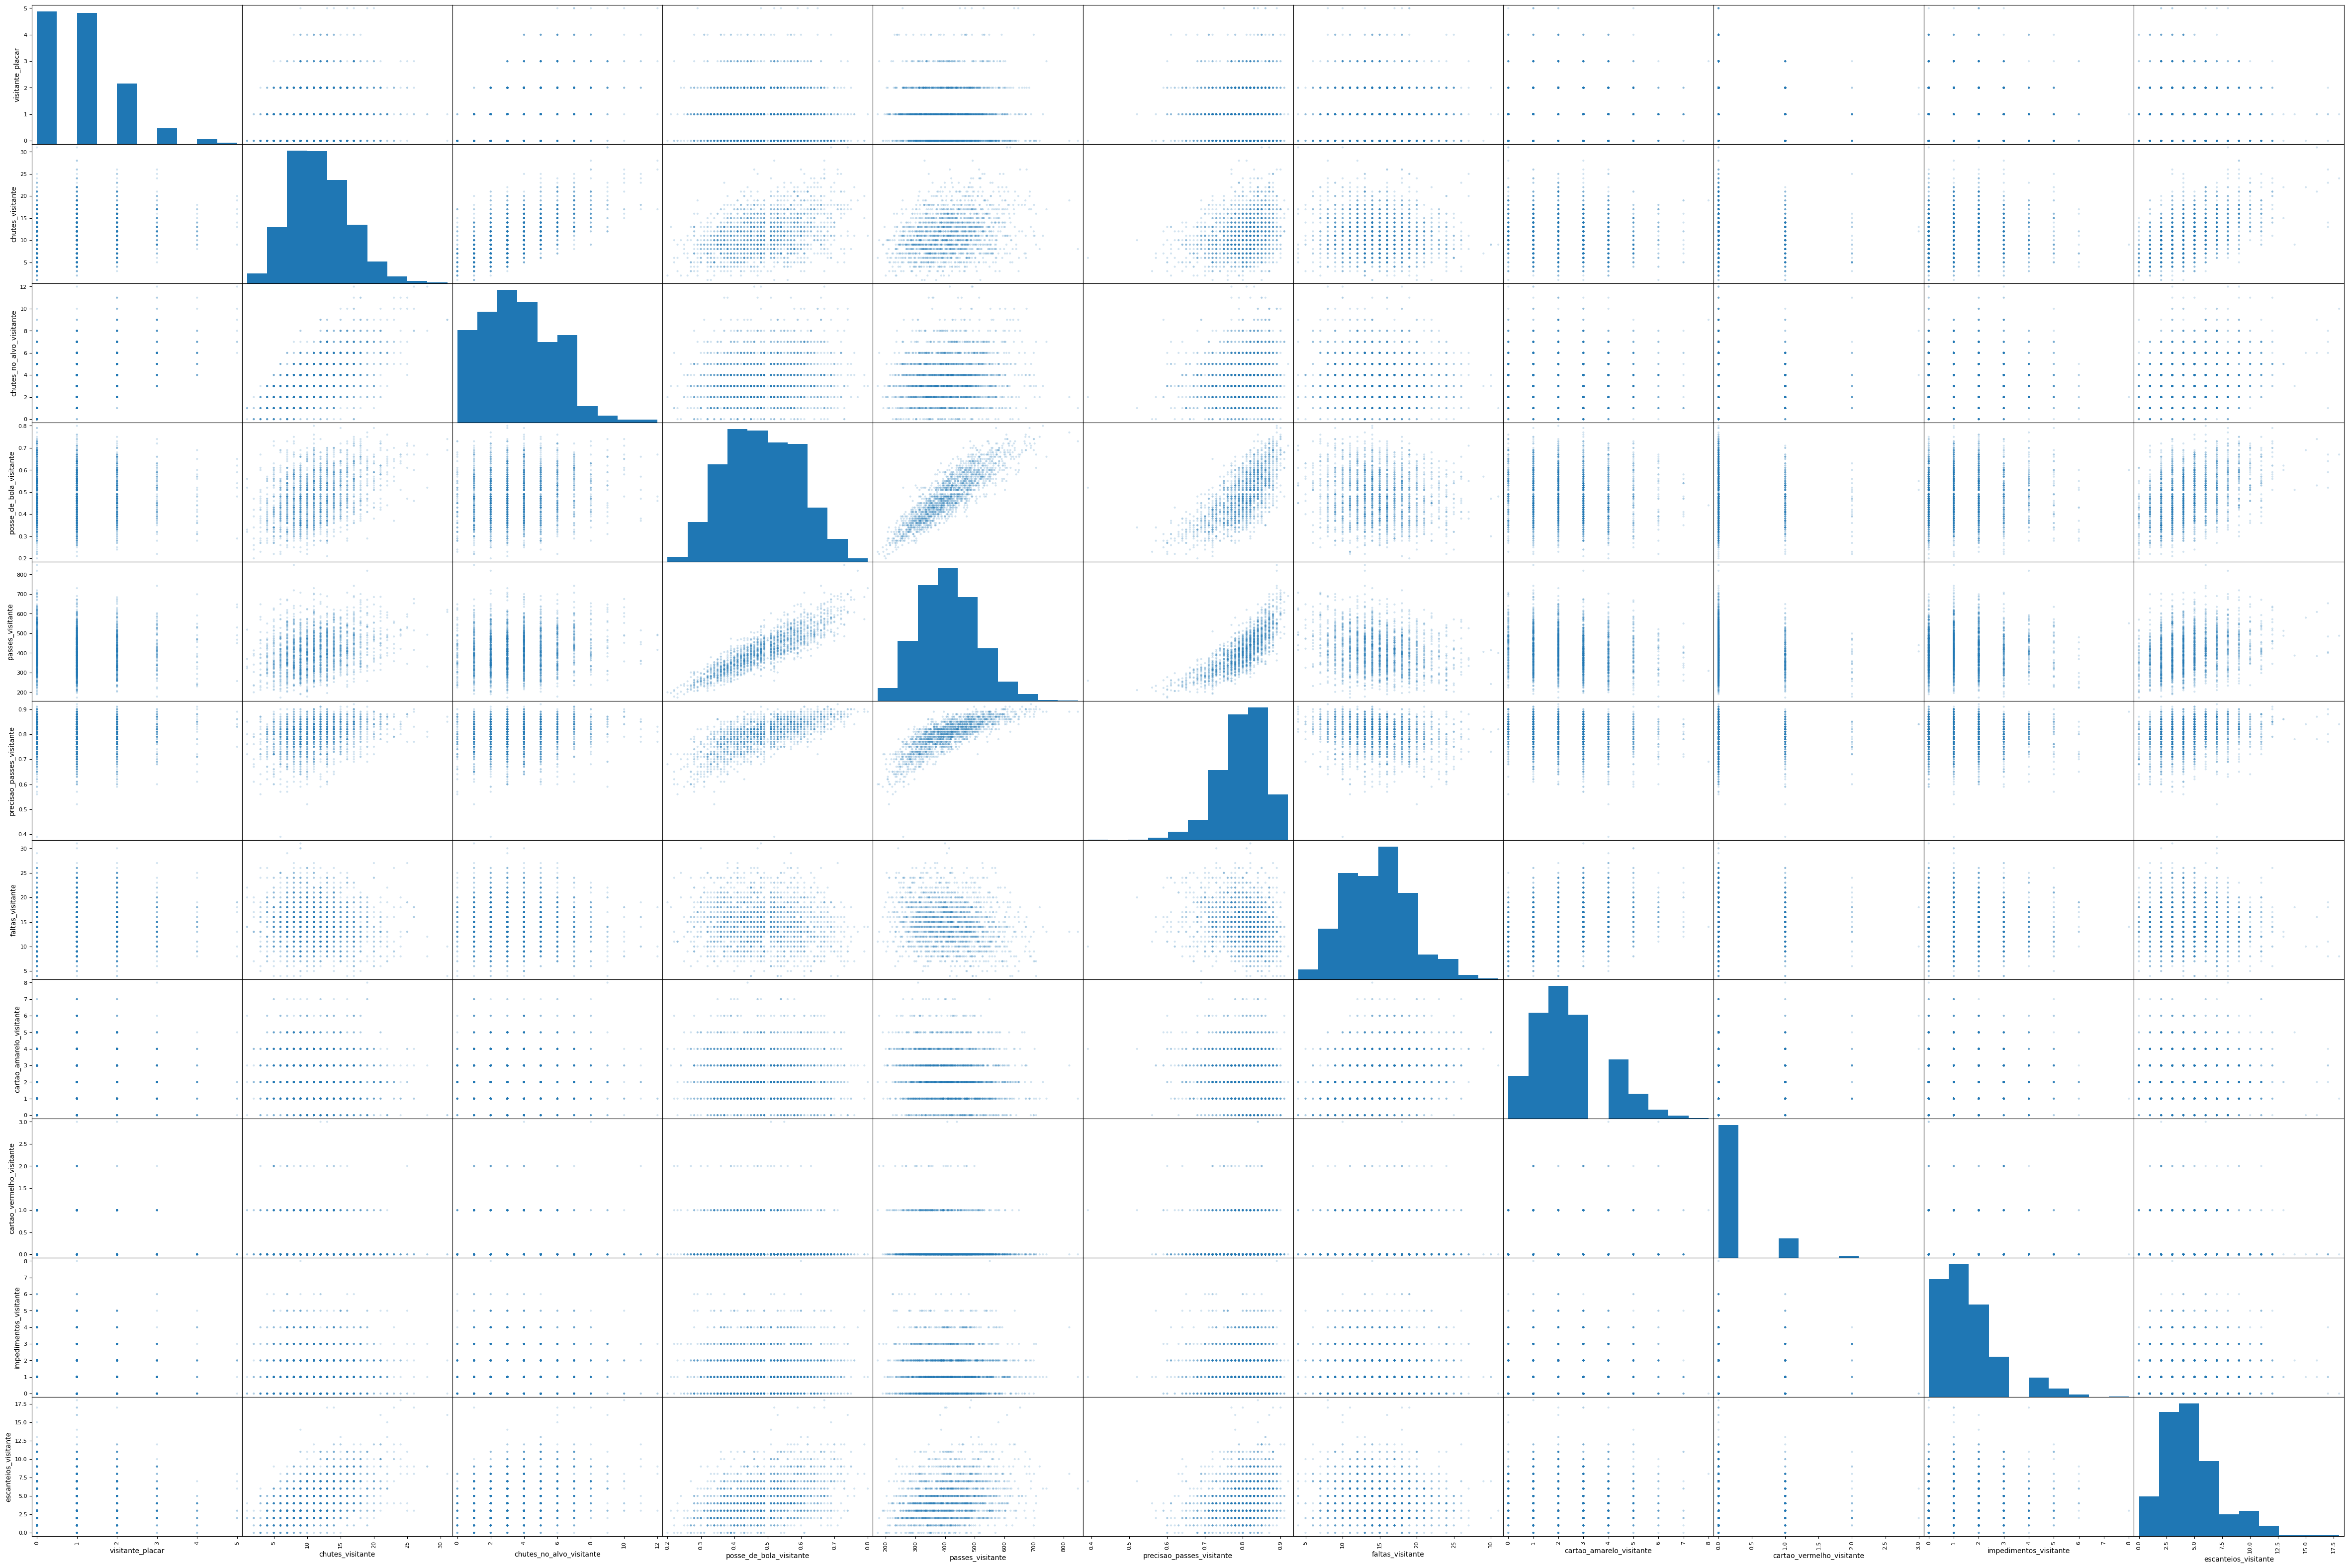

In [ ]:
scatter_matrix(df[attvisitante], figsize=(60,40), alpha=0.2)

In [ ]:
mandante = len(df.resultado[(df['resultado']==1)])
visitante = len(df.resultado[(df['resultado']==2)])
empate = len(df.resultado[(df['resultado']==3)])

sizes  =[mandante,visitante,empate]
label = ["Mandante","Visitante","Empate"]

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=label,autopct='%1.1f%%', shadow=True,startangle=300,colors=["green","red","yellow"])
ax1.set_title("Percentual de Vitorias (2018 a 2022)")
ax1.axis('equal')
plt.show()